### <u>Problem Statement</u> <a id='top' />

Attached is a dataset which shows the flower classification ML problem. The task is to predict the class of the plant based on certain features given in the excel file. The xlsx has 2 components one showing the variables data and another file showing the explanation of what each of these variables mean.

<b> Dataset</b>: Plant_Tree_data.xlsx 

For this problem, ignore the problem metrics. Ignore the units of tree length like mm or cm. For e.g. do not think that the tree length is in mm or cm. All the measures are metric-less (unit less) and for this problem treat each column in that capacity.


### <u>Solution</u>:


### Import the libraries and Load the dataset and Remove/replace missing values (if any)

> ###### - [Target Column](#target_col): Visualizing Distribution.
> > This is to visualize the target column to see if it is not an imbalanced class.
> ###### - [Missing Data](#missing_data): Check on features with Missing data.
> > This step is done to check the missing data at each feature level. This is required to identify which features requrie data imputation during Pre-processing step and if any feature needs to be dropped in case majority values are missing.

### Split features and labels

### Select Train/Test data.

> ###### - [Train-Test split](#train_test): Splitting the data into training set and testing set. Split ratio: 70 (training):30 (testing)
> > This is important as the data needs to be seperated out in 2 parts at least. Training and Test (70:30) set where Test set is kept aside just to validate the Model's performance and cannot be given or used while modeling at all.

### Training the model.

> ###### - [Training Model](#modelling): Training differnt models on training set.
> > Model (Decision tree classifier in this case) is then trained on the Training data set and is evaluated. 
> > Another model (Random Forest Classifier which uses Bagging technique) is then trained to observe if major improvements are observed.

### Model Evaluation.

> ###### - [Model Evaluation](#model_eval): Evaluating the performance of the model and finalizing the model.
> > This helps in identifying which Model is performing better as well as generalized so its Accuary, precision, recall & F1 scores can be maintained on future unseen data as well.


### <u>Case 1</u>: For the dataset, implement the Random Forest classifier using Python.

#### <u>Step1</u>: Import the libraries and Load the dataset and Remove/replace missing values (if any)

In [52]:
# importing libraries
import pandas as pd
import numpy as np

# For Modeling, Evaluation metrics, train-test data preparation
from sklearn.metrics import auc, confusion_matrix, plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.ensemble import RandomForestClassifier 

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# For Data imputation
from sklearn import impute
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# settings
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250
sns.set(style="whitegrid")

In [53]:
# Load the dataset
raw_df = pd.read_excel("Plant_Tree_data.xlsx")

In [54]:
#Visualizing header rows
raw_df.head()

,LeafLength,LeafBreadth,ErrorLeafLength,ErrorLeafBreadth,LeafCurveAngle,EdgeCurvatureAngle,ErrorLeafCurvature,TreeLength,TreeType
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [55]:
raw_df.describe()

,LeafLength,LeafBreadth,ErrorLeafLength,ErrorLeafBreadth,LeafCurveAngle,EdgeCurvatureAngle,ErrorLeafCurvature,TreeLength,TreeType
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [56]:
# Looking at columns counts, nulls, Dtypes and Index range
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LeafLength          17898 non-null  float64
 1   LeafBreadth         17898 non-null  float64
 2   ErrorLeafLength     17898 non-null  float64
 3   ErrorLeafBreadth    17898 non-null  float64
 4   LeafCurveAngle      17898 non-null  float64
 5   EdgeCurvatureAngle  17898 non-null  float64
 6   ErrorLeafCurvature  17898 non-null  float64
 7   TreeLength          17898 non-null  float64
 8   TreeType            17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


#### EDA (Exploratory Data Analysis)

##### <u>Target column</u>: Visualizing distribution <a id='target_col'/>

   TreeType  Counts    pct
0         0   16259  90.84
1         1    1639   9.16
 


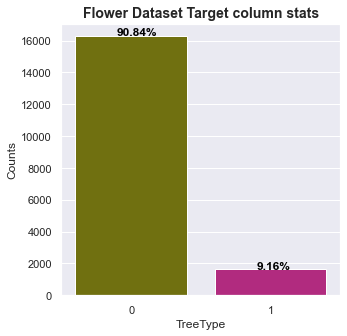

In [57]:
sns.set(style="darkgrid")
targetcoldf = raw_df.groupby('TreeType').agg({'TreeType':['count']}).reset_index()
targetcoldf.columns = ['TreeType','Counts']
targetcoldf['pct'] = round(targetcoldf['Counts']/(len(raw_df))*100,2)
palette = ['olive','mediumvioletred']
print (targetcoldf.head())
print (" ")
fig, ax = plt.subplots(figsize=(5,5))
fig = sns.barplot(y='Counts', x='TreeType',data=targetcoldf, ci = None, orient='v', palette=palette)

# y_lab = ['Negative', 'Positive']
# ax.set_xticklabels(labels=y_lab, ha='right')

for i, v in enumerate(targetcoldf['pct']):
    ax.text(i-0.1, v*180, str(v)+'%', color='black', fontweight='bold')

plt.title('Flower Dataset Target column stats',size = 14, weight = 'bold')
plt.ylabel('Counts')
plt.xlabel('TreeType');


##### <u>Observation</u>:
> The Target column distribution looks imbalanced. In case, the model isn't able to capture minority class, then can look for Oversampling/Undersampling techiniques.

#### <u>Missing Data</u>: Check on features with Missing data. <a id='missing_data' />

In [58]:
def get_missing_data_stats(df):
    missing_data = df.isin([-99, -999, np.nan]).sum()
    per_missing_data = round(missing_data/len(df)*100,2).sort_values(ascending=False)
    if (len(per_missing_data[per_missing_data > 0]) > 0):
        print ('Below are columns with correspondind missing data %s:')
        print ('-----------------------------------------------------')
        print ('Column ~ Missing %')
        print ('-------------------')
        print (per_missing_data[per_missing_data > 0])
        print ('-------------------')

        plt.subplots(figsize=(9,9))
        sns.heatmap(df.isin([-99, -999, np.nan]))
        plt.show()
    else:
        print ('------------------------------')
        print ('No column has missing data :-)')
        print ('------------------------------')

In [59]:
get_missing_data_stats(raw_df)

------------------------------
No column has missing data :-)
------------------------------


#### <u>Step2</u>: Split features and labels

In [60]:
# Copy raw_df to features_df and drop Target column to keep only features column in it
features_df = raw_df.copy()
features_df.drop(axis='1', columns='TreeType', inplace=True)

# Copy only target column to labels df
labels_df = raw_df['TreeType'].copy()

#### <u>Step3</u>: Split train and test data

In [61]:
# Splitting data to Train and test sets
X_train, X_test, y_train, y_test = train_test_split(features_df, labels_df, test_size=0.3, random_state=41)

#### <u>Step4</u>: Implement Random Forest Classifier

In [62]:
print ('=================================')
print ('Total Data Shape: ', raw_df.shape)
print ('=================================')
print ('Train Data Shape: ', X_train.shape)
print ('Test Data Shape:  ', X_test.shape)
print ('=================================')

Total Data Shape:  (17898, 9)
Train Data Shape:  (12528, 8)
Test Data Shape:   (5370, 8)


In [63]:
# Create Model using RandomForest Classifier
model_rf = RandomForestClassifier(n_estimators=23, criterion='gini',random_state=42)

# Fit the model
model_rf.fit(X=X_train, y=y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=23,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

#### <u>Step5</u>: Calculate accuracy measures

> - Check Accuarcy/Precision/Recall
> - Predict on test set and match with result 
> - Visualizing model structure

In [64]:
# Predict on test data using RandomForest Tree classifier

model_rf.fit(X_train, y_train)
y_predict_rf = model_rf.predict(X=X_test)

Accuracy of classifier is : 0.9783985102420857
              precision    recall  f1-score   support

     class_0       0.98      0.99      0.99      4895
     class_1       0.91      0.84      0.87       475

    accuracy                           0.98      5370
   macro avg       0.95      0.92      0.93      5370
weighted avg       0.98      0.98      0.98      5370



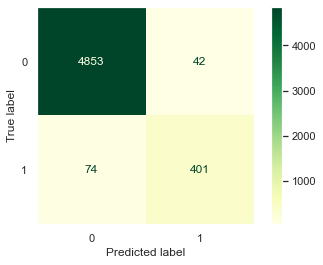

In [65]:
# validate accuracy of RandomForest Classifier

print ("Accuracy of classifier is :", accuracy_score(y_true=y_test, y_pred=y_predict_rf))
print (classification_report(y_true=y_test, y_pred=y_predict_rf, target_names=['class_0','class_1']))
plot_confusion_matrix(estimator=model_rf, X=X_test, y_true=y_test, values_format='.0f',cmap='YlGn')
plt.grid(False)

##### =============== End of Case 1 =============== 

### <u>Case 2</u>: For the same dataset, implement classification with the neural network using Keras in Python.

#### <u>Step1</u>: Import the libraries and Load the dataset and Remove/replace missing values (if any)

In [36]:
# Importing Keras and Neural network related libraries

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

In [40]:
# Load the dataset
nn_df = pd.read_excel("Plant_Tree_data.xlsx")

In [41]:
#Visualizing header rows
nn_df.head()

,LeafLength,LeafBreadth,ErrorLeafLength,ErrorLeafBreadth,LeafCurveAngle,EdgeCurvatureAngle,ErrorLeafCurvature,TreeLength,TreeType
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [42]:
nn_df.describe()

,LeafLength,LeafBreadth,ErrorLeafLength,ErrorLeafBreadth,LeafCurveAngle,EdgeCurvatureAngle,ErrorLeafCurvature,TreeLength,TreeType
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [43]:
nn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LeafLength          17898 non-null  float64
 1   LeafBreadth         17898 non-null  float64
 2   ErrorLeafLength     17898 non-null  float64
 3   ErrorLeafBreadth    17898 non-null  float64
 4   LeafCurveAngle      17898 non-null  float64
 5   EdgeCurvatureAngle  17898 non-null  float64
 6   ErrorLeafCurvature  17898 non-null  float64
 7   TreeLength          17898 non-null  float64
 8   TreeType            17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


#### <u>Missing Data</u>: Check on features with Missing data. <a id='missing_data' />

In [44]:
get_missing_data_stats(raw_df)

------------------------------
No column has missing data :-)
------------------------------


#### <u>Step2</u>: Split features and labels

In [45]:
# Copy raw_df to features_df and drop Target column to keep only features column in it
nn_features_df = nn_df.copy()
nn_features_df.drop(axis='1', columns='TreeType', inplace=True)

# Copy only target column to labels df
nn_labels_df = nn_df['TreeType'].copy()

#### <u>Step3</u>: Split train and test data

In [46]:
# Splitting data to Train and test sets
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(nn_features_df, nn_labels_df, test_size=0.3, random_state=41)

#### <u>Step4</u>: Implement Neural Network Classifier using Keras

In [48]:
print ('=================================')
print ('Total Data Shape: ', nn_df.shape)
print ('=================================')
print ('Train Data Shape: ', X_train_nn.shape)
print ('Test Data Shape:  ', X_test_nn.shape)
print ('=================================')

Total Data Shape:  (17898, 9)
Train Data Shape:  (12528, 8)
Test Data Shape:   (5370, 8)


In [49]:
# Create NeuralNetwork Model using Keras

# create model
model = Sequential()
model.add(Dense(32, input_dim=8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [50]:
# fit the model
nn_model = model.fit(X_train, y_train, epochs=11, validation_data=(X_test, y_test),verbose=2 )

Epoch 1/11
392/392 - 0s - loss: 0.7728 - accuracy: 0.9478 - val_loss: 0.1365 - val_accuracy: 0.9702
Epoch 2/11
392/392 - 0s - loss: 0.1108 - accuracy: 0.9731 - val_loss: 0.1344 - val_accuracy: 0.9709
Epoch 3/11
392/392 - 0s - loss: 0.1098 - accuracy: 0.9728 - val_loss: 0.1015 - val_accuracy: 0.9721
Epoch 4/11
392/392 - 0s - loss: 0.0992 - accuracy: 0.9745 - val_loss: 0.1010 - val_accuracy: 0.9696
Epoch 5/11
392/392 - 0s - loss: 0.0944 - accuracy: 0.9738 - val_loss: 0.0955 - val_accuracy: 0.9724
Epoch 6/11
392/392 - 0s - loss: 0.0953 - accuracy: 0.9751 - val_loss: 0.1140 - val_accuracy: 0.9695
Epoch 7/11
392/392 - 0s - loss: 0.0925 - accuracy: 0.9751 - val_loss: 0.0983 - val_accuracy: 0.9719
Epoch 8/11
392/392 - 0s - loss: 0.0925 - accuracy: 0.9741 - val_loss: 0.0947 - val_accuracy: 0.9732
Epoch 9/11
392/392 - 0s - loss: 0.0875 - accuracy: 0.9749 - val_loss: 0.0986 - val_accuracy: 0.9743
Epoch 10/11
392/392 - 0s - loss: 0.0916 - accuracy: 0.9761 - val_loss: 0.1129 - val_accuracy: 0.9695

In [72]:
print ("Training Accuracy   :",nn_model.history['accuracy'][10])
print ("Validation Accuracy :",nn_model.history['val_accuracy'][10])

Training Accuracy   : 0.9751756191253662
Validation Accuracy : 0.9746741056442261


#### <u>Step5</u>: Calculate accuracy measures
> - Check Accuarcy, loss, validation Accurary, validation loss
> - Visualizing model structure

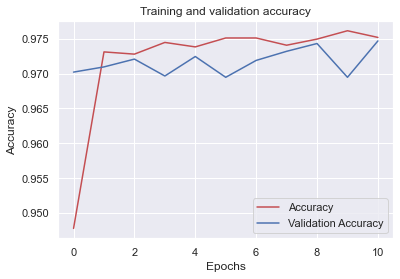

<Figure size 432x288 with 0 Axes>

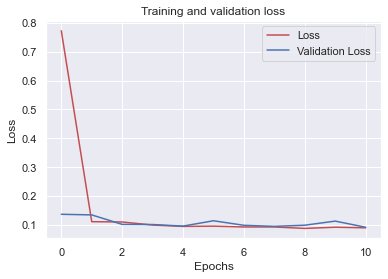

<Figure size 432x288 with 0 Axes>

In [51]:
## Plotting the training and validation accuracy & losses...

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=nn_model.history['accuracy']
val_acc=nn_model.history['val_accuracy']
loss=nn_model.history['loss']
val_loss=nn_model.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()
plt.show()
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()
plt.show()

### <u>Results Comparison</u>: Accuracies for both the algorithms and our inferences.

### Accuracy observed in Random Forest 
> Accuracy of classifier is : 0.9783985102420857

                precision    recall  f1-score   support

     class_0       0.98      0.99      0.99      4895
     class_1       0.91      0.84      0.87       475

    accuracy                           0.98      5370
    macro avg      0.95      0.92      0.93      5370
    weighted avg   0.98      0.98      0.98      5370


### Accurancy observed with Neural Network Classifier:
> Training Accuracy   : 0.9751756191253662
> Validation Accuracy : 0.9746741056442261

### As we can see above, both models are performing nearly with same Accuracy and other evaluation metrics. 
### Hence, we infer that for the given dataset [~18k, 8 Features], 
> ## <u> Random Forest Classifier is more suitable as it is computationally less intensive</u>